In [1]:
#import all libriaries needed

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from   mpl_toolkits.mplot3d import Axes3D
import glob
from   skimage.feature import hog
from   sklearn.preprocessing import StandardScaler
import time
from   sklearn.svm import LinearSVC
from   sklearn.cross_validation import train_test_split
#from   sklearn.model_selection import train_test_split

/Users/Mikkawi/anaconda/envs/P5/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# all necessary functions deveoped through the learning material for Project 5

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)
    # draw each bounding box on your image copy using cv2.rectangle()
    # return the image copy with boxes drawn
    for bbox in bboxes:
        draw_img = cv2.rectangle(draw_img,bbox[0],bbox[1],color,thick)
    return draw_img

def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the 3 channels  separately
    channel_1 = np.histogram(img[:,:,0], bins =32, range=(0,256))
    channel_2 = np.histogram(img[:,:,1], bins=32, range=(0, 256))
    channel_3 = np.histogram(img[:,:,2], bins=32, range=(0, 256))
    # Generating bin centers
    bin_edges = channel_1[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel_1[0], channel_2[0], channel_3[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    
    #if color_space != 'RGB':
    #    if color_space == 'HSV':
    #        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    #    elif color_space == 'LUV':
    #        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    #    elif color_space == 'HLS':
    #        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    #    elif color_space == 'YUV':
    #        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    #    elif color_space == 'YCrCb':
    #        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    #else: feature_image = np.copy(img)             
    #feature_image = np.copy(img)
    # Use cv2.resize().ravel() to create the feature vector
    #features = cv2.resize(feature_image, size).ravel() 
    #print('bin_spatial: ',len(features))
    # Return the feature vector
    return cv2.resize(img, size).ravel()

def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict

def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features
'''    
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
    

    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)         
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # Apply color_hist() also with a color space option now
        hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
        # hog features too here?
       # hog_features = get_hog_features(gray,9,4,2,vis=False, feature_vec=True)

        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append the new feature vector to the features list
        
        features.append(np.concatenate((spatial_features, hist_features)))
        #features.append(np.concatenate((spatial_features, hist_features,hog_features)))
    # Return list of feature vectors
    return features
'''
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list


def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

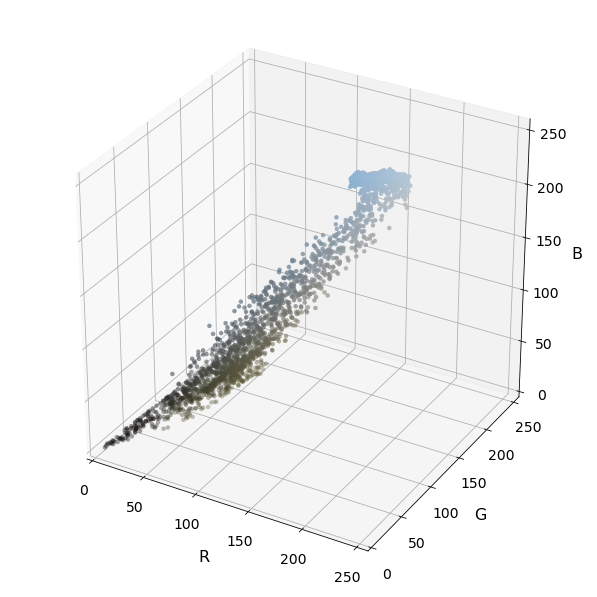

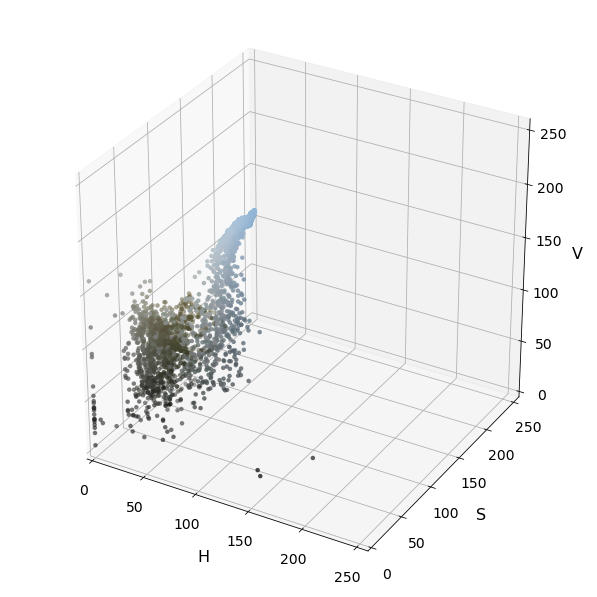

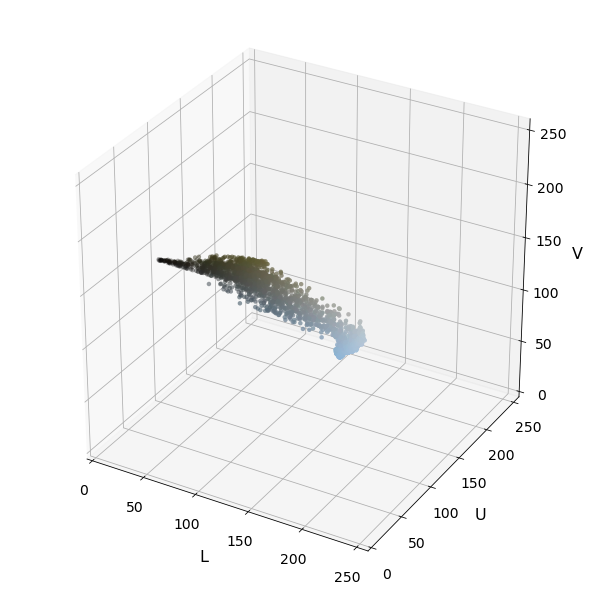

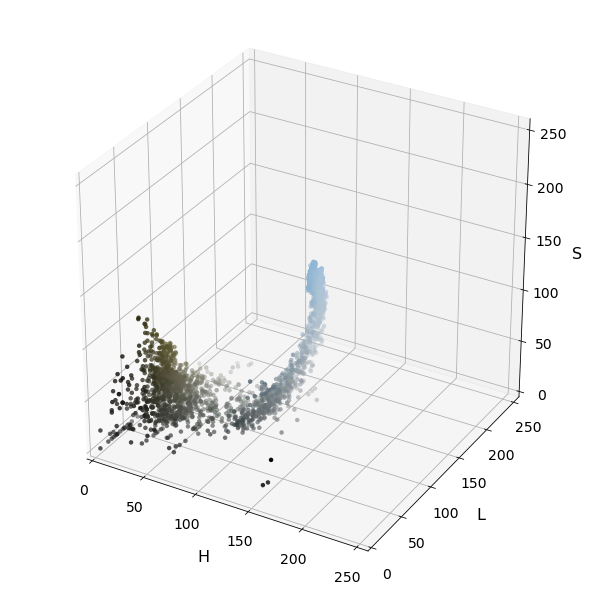

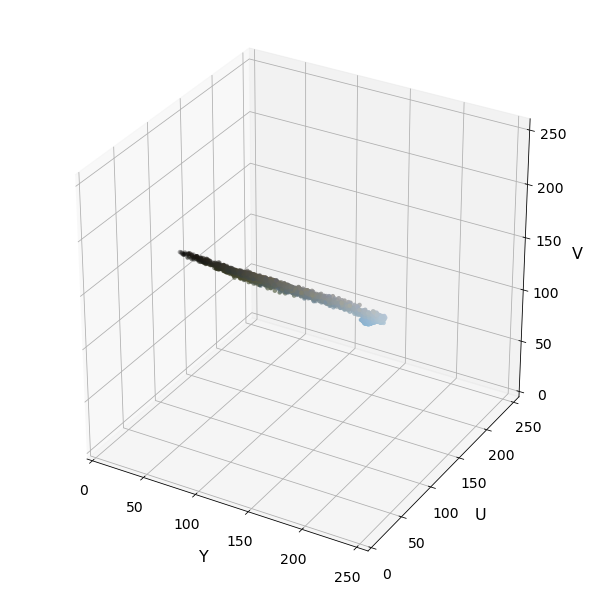

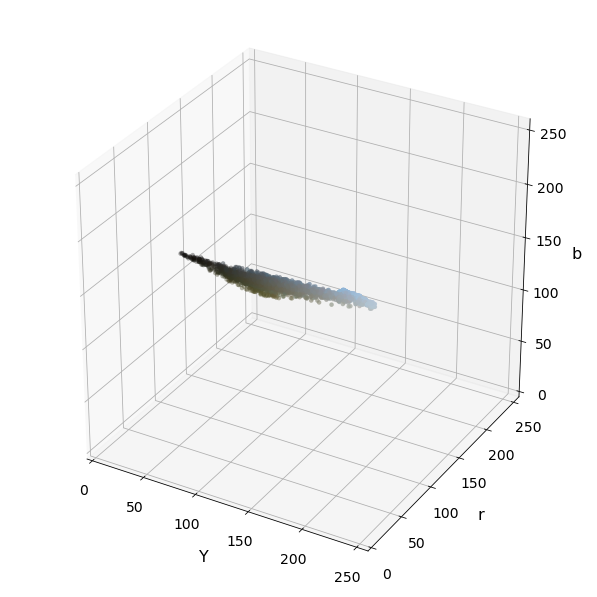

In [16]:
# Test several feature extraction methods .. color histogram and HOG and 
# First will visualize on 3D color map
# then visualize HOG

# Read a color image 
# NON-CAR Image
img = cv2.imread("color_space/2.png")

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_LUV = cv2.cvtColor(img_small, cv2.COLOR_BGR2LUV)
img_small_HLS = cv2.cvtColor(img_small, cv2.COLOR_BGR2HLS)
img_small_YUV = cv2.cvtColor(img_small, cv2.COLOR_BGR2YUV)
img_small_YCrCb = cv2.cvtColor(img_small, cv2.COLOR_BGR2YCrCb)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

plot3d(img_small_LUV, img_small_rgb, axis_labels=list("LUV"))
plt.show()

plot3d(img_small_HLS, img_small_rgb, axis_labels=list("HLS"))
plt.show()

plot3d(img_small_YUV, img_small_rgb, axis_labels=list("YUV"))
plt.show()

plot3d(img_small_YCrCb, img_small_rgb, axis_labels=list("Yrb"))
plt.show()



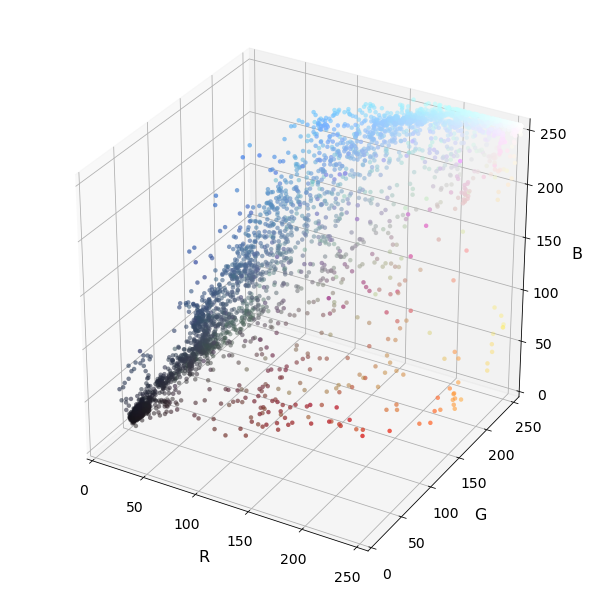

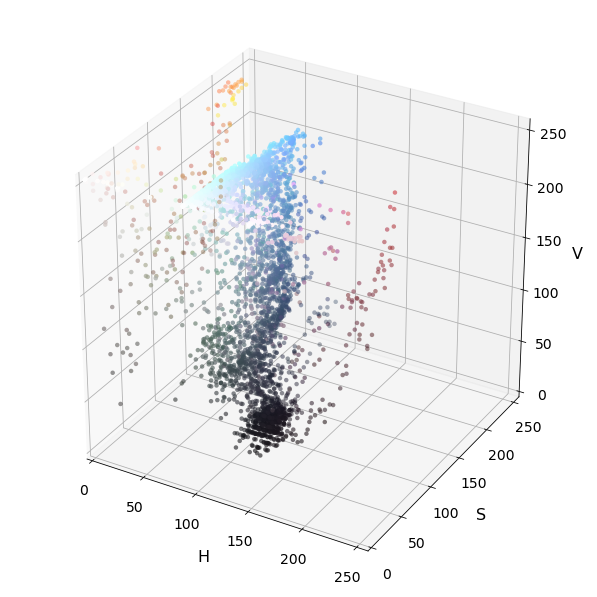

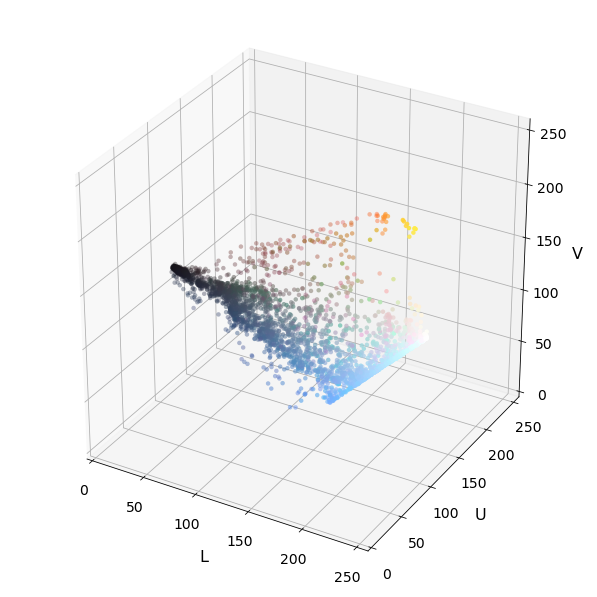

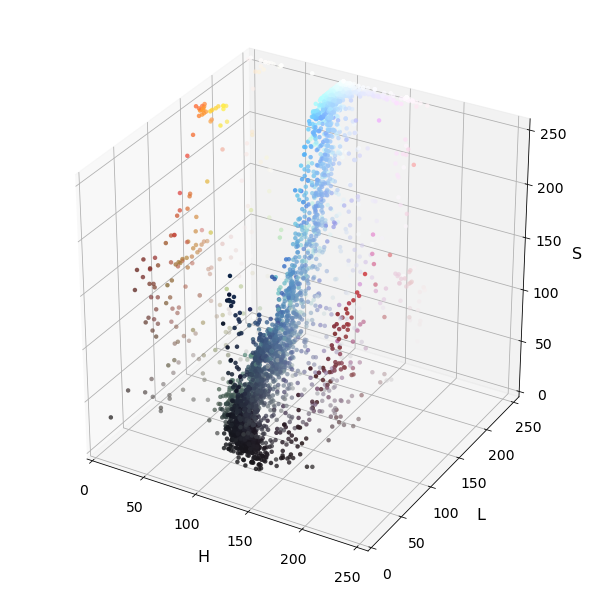

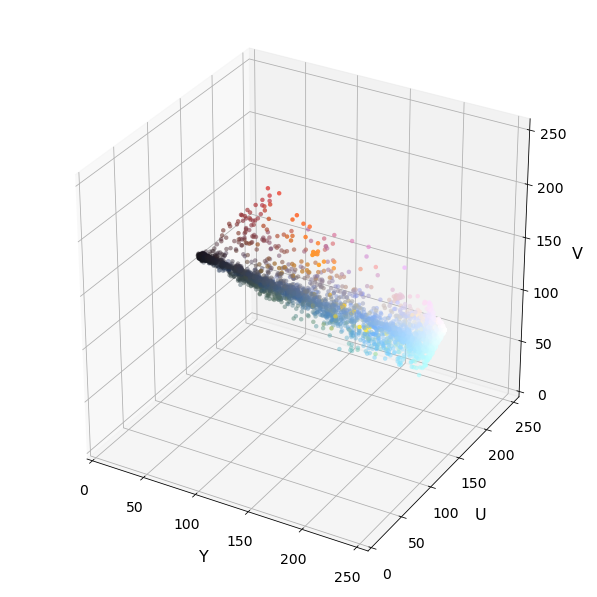

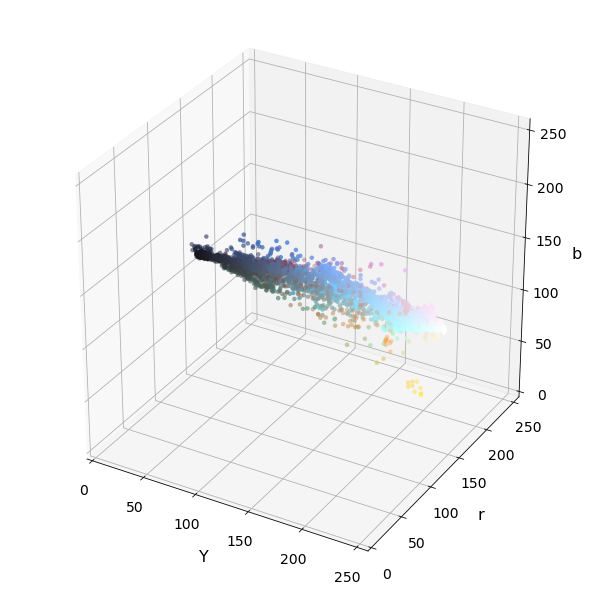

In [10]:
# Read a color image
# CAR IMAGE
img = cv2.imread("color_space/31.png")

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_LUV = cv2.cvtColor(img_small, cv2.COLOR_BGR2LUV)
img_small_HLS = cv2.cvtColor(img_small, cv2.COLOR_BGR2HLS)
img_small_YUV = cv2.cvtColor(img_small, cv2.COLOR_BGR2YUV)
img_small_YCrCb = cv2.cvtColor(img_small, cv2.COLOR_BGR2YCrCb)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

plot3d(img_small_LUV, img_small_rgb, axis_labels=list("LUV"))
plt.show()

plot3d(img_small_HLS, img_small_rgb, axis_labels=list("HLS"))
plt.show()

plot3d(img_small_YUV, img_small_rgb, axis_labels=list("YUV"))
plt.show()

plot3d(img_small_YCrCb, img_small_rgb, axis_labels=list("Yrb"))
plt.show()


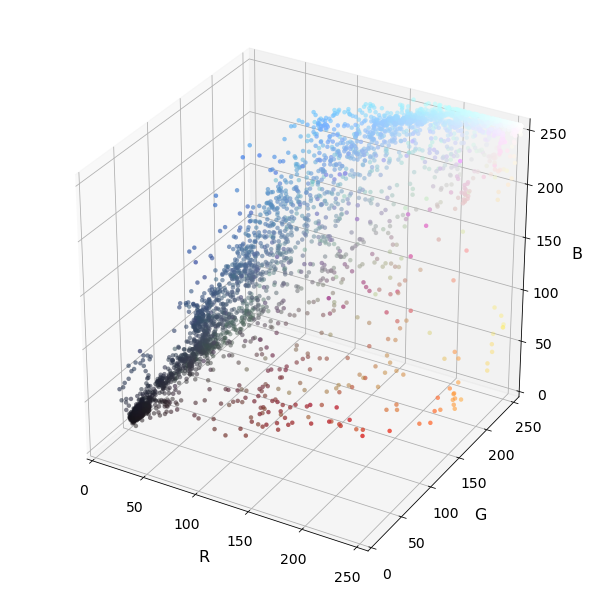

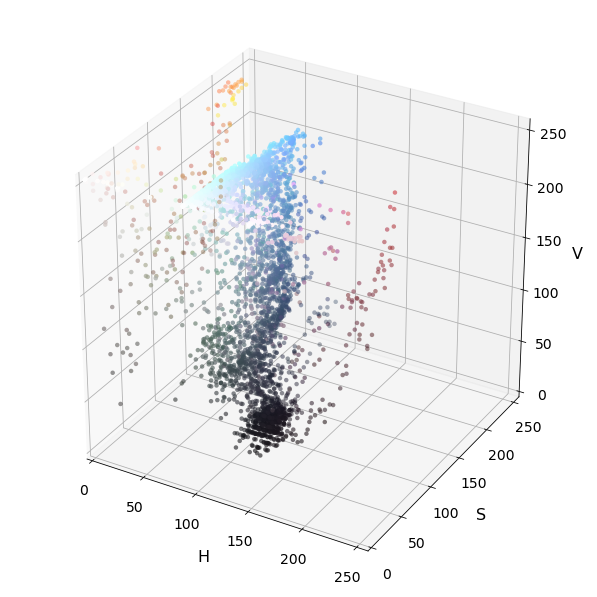

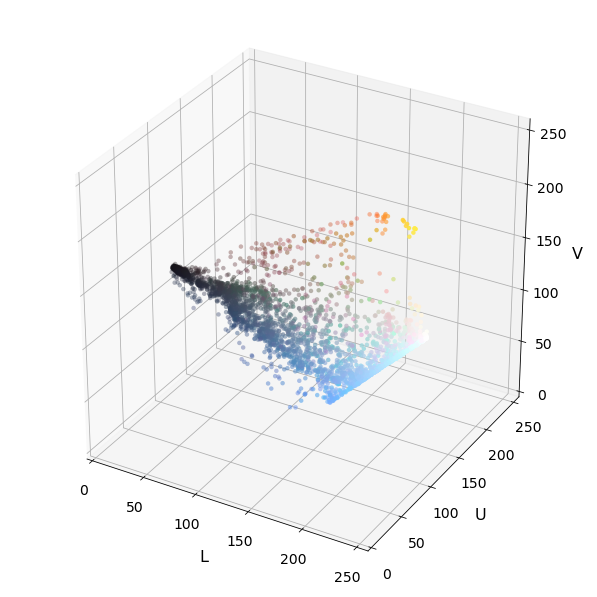

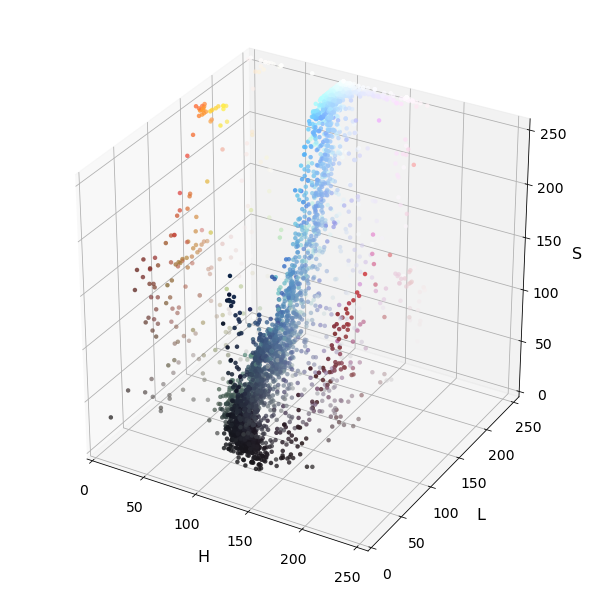

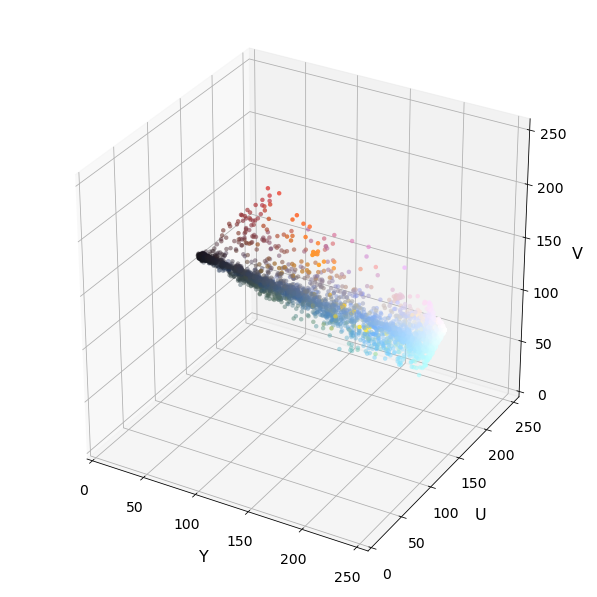

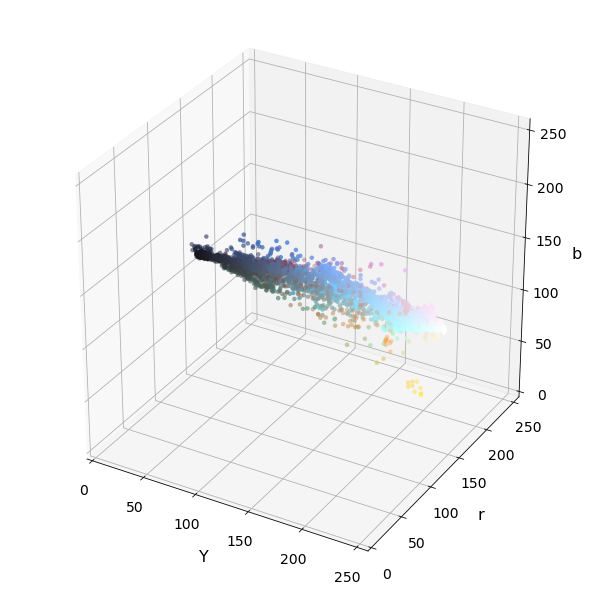

In [11]:
# Read a color image
img = cv2.imread("color_space/53.png")

# Select a small fraction of pixels to plot by subsampling it
#scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
#img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_LUV = cv2.cvtColor(img_small, cv2.COLOR_BGR2LUV)
img_small_HLS = cv2.cvtColor(img_small, cv2.COLOR_BGR2HLS)
img_small_YUV = cv2.cvtColor(img_small, cv2.COLOR_BGR2YUV)
img_small_YCrCb = cv2.cvtColor(img_small, cv2.COLOR_BGR2YCrCb)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

plot3d(img_small_LUV, img_small_rgb, axis_labels=list("LUV"))
plt.show()

plot3d(img_small_HLS, img_small_rgb, axis_labels=list("HLS"))
plt.show()

plot3d(img_small_YUV, img_small_rgb, axis_labels=list("YUV"))
plt.show()

plot3d(img_small_YCrCb, img_small_rgb, axis_labels=list("Yrb"))
plt.show()

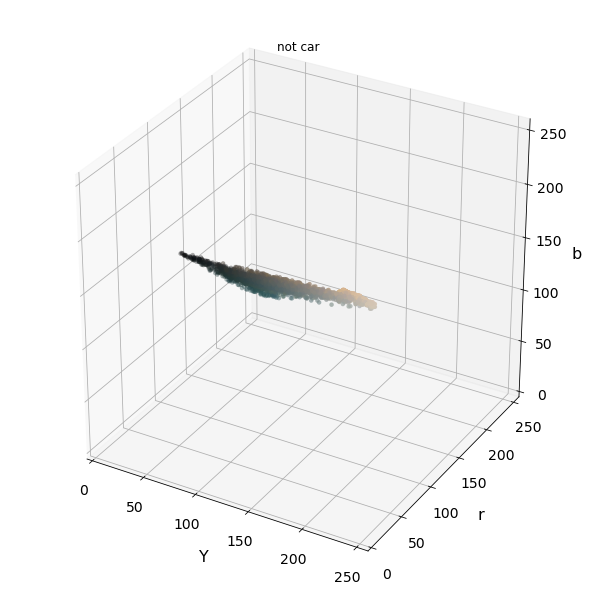

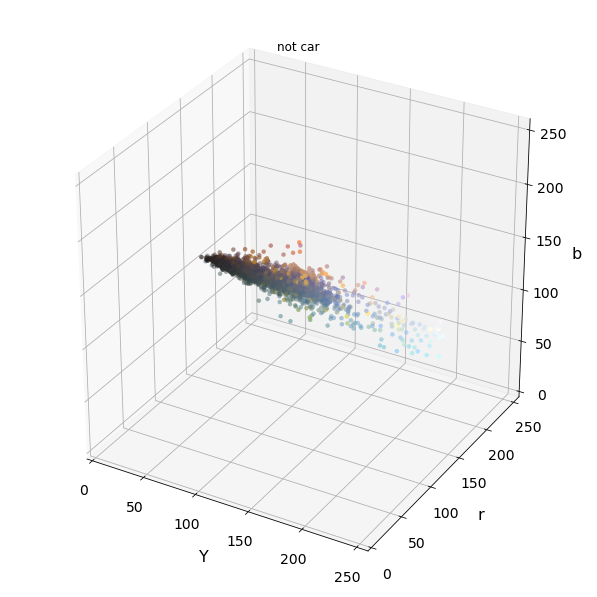

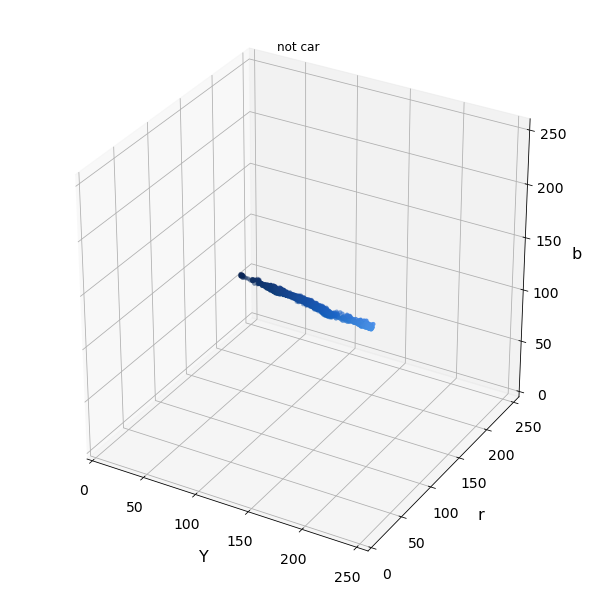

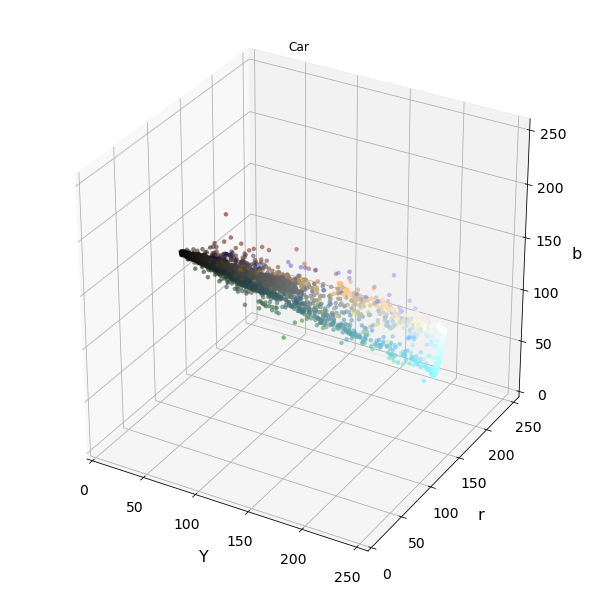

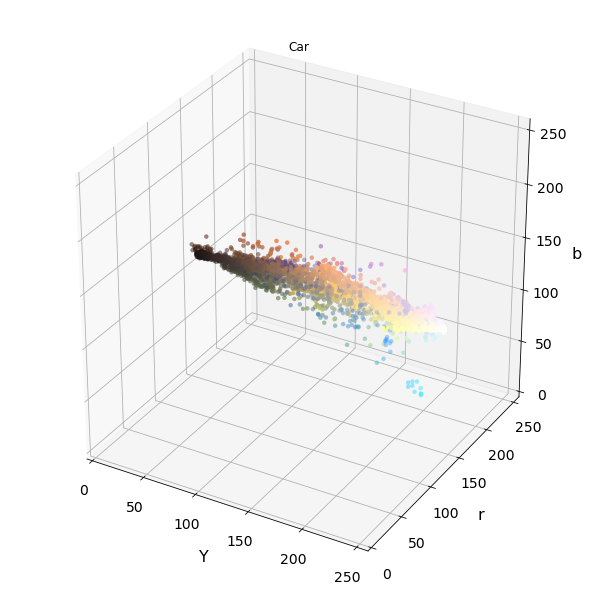

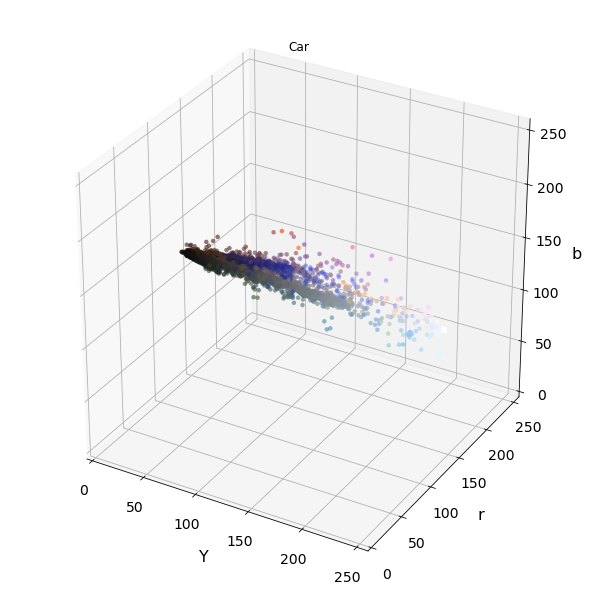

In [12]:
#Exploring YCrCb color space

img1 = cv2.imread("color_space/2.png")
img2 = cv2.imread("color_space/3.png")
img3 = cv2.imread("color_space/8.png")
img4 = cv2.imread("color_space/25.png")
img5 = cv2.imread("color_space/31.png")
img6 = cv2.imread("color_space/53.png")

img_small_YCrCb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2YCrCb)
img_small_YCrCb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2YCrCb)
img_small_YCrCb3 = cv2.cvtColor(img3, cv2.COLOR_BGR2YCrCb)
img_small_YCrCb4 = cv2.cvtColor(img4, cv2.COLOR_BGR2YCrCb)
img_small_YCrCb5 = cv2.cvtColor(img5, cv2.COLOR_BGR2YCrCb)
img_small_YCrCb6 = cv2.cvtColor(img6, cv2.COLOR_BGR2YCrCb)

# Plot and show
plot3d(img_small_YCrCb1, img1/255, axis_labels=list("Yrb"))
plt.title('not car')
plt.show()

plot3d(img_small_YCrCb2, img2/255, axis_labels=list("Yrb"))
plt.title('not car')
plt.show()

plot3d(img_small_YCrCb3, img3/255, axis_labels=list("Yrb"))
plt.title('not car')
plt.show()

plot3d(img_small_YCrCb4, img4/255, axis_labels=list("Yrb"))
plt.title('Car')
plt.show()

plot3d(img_small_YCrCb5, img5/255, axis_labels=list("Yrb"))
plt.title('Car')
plt.show()

plot3d(img_small_YCrCb6, img6/255, axis_labels=list("Yrb"))
plt.title('Car')
plt.show()


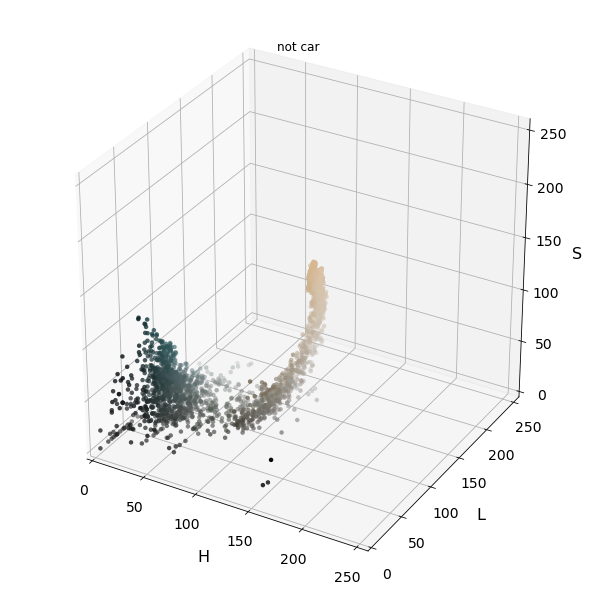

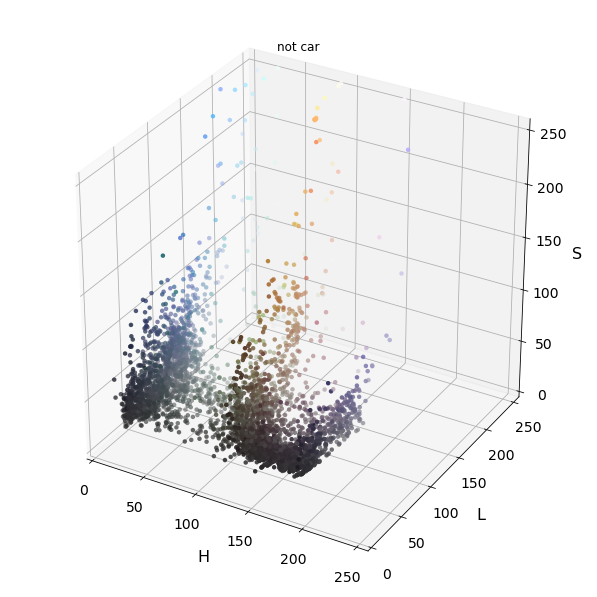

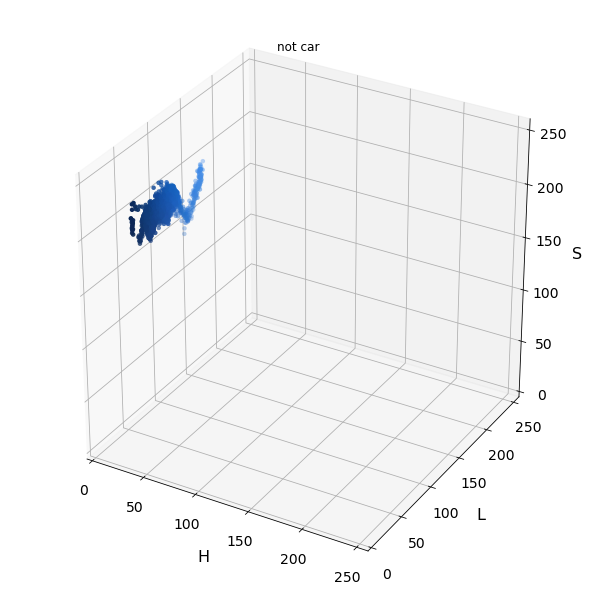

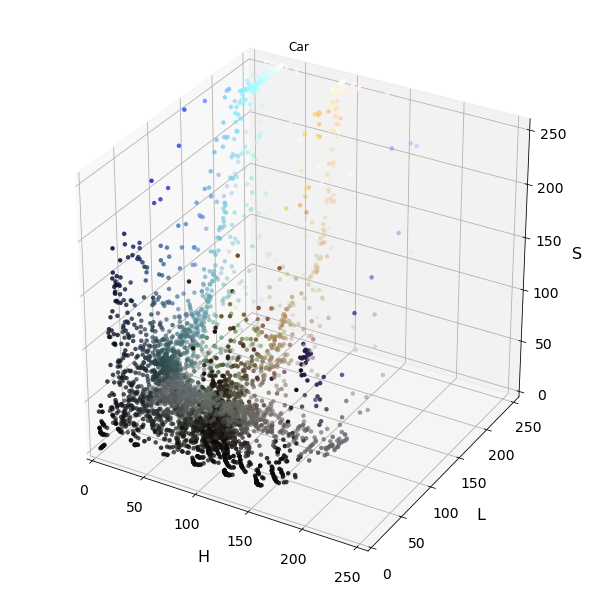

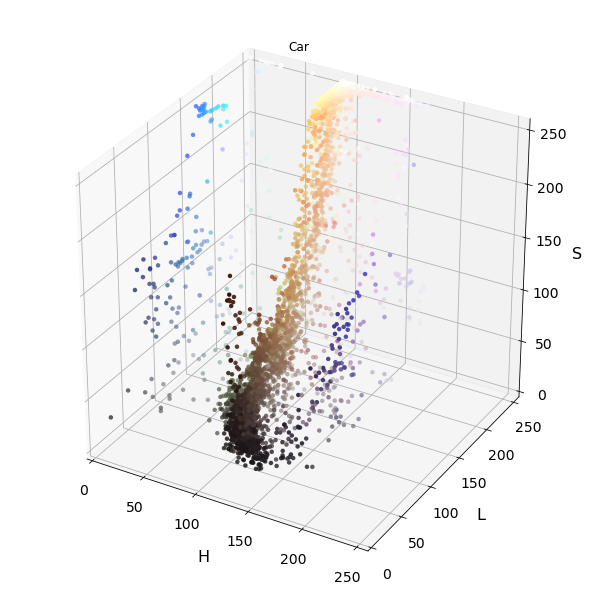

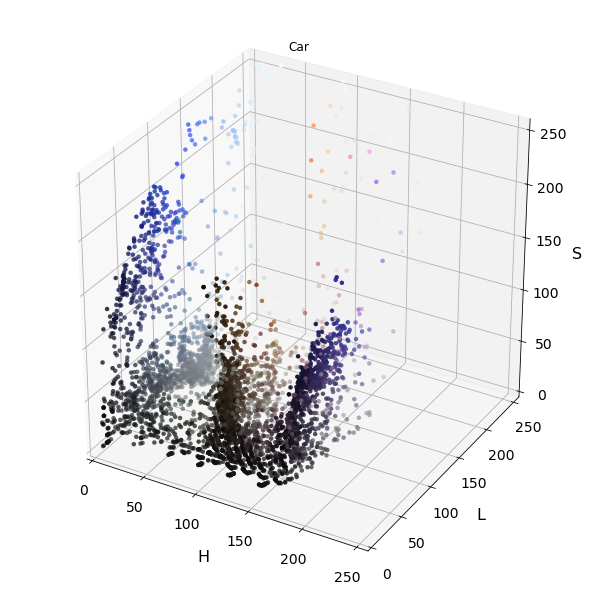

In [13]:
# Exploring HLS color space

img1 = cv2.imread("color_space/2.png")
img2 = cv2.imread("color_space/3.png")
img3 = cv2.imread("color_space/8.png")
img4 = cv2.imread("color_space/25.png")
img5 = cv2.imread("color_space/31.png")
img6 = cv2.imread("color_space/53.png")

img_small_YCrCb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HLS)
img_small_YCrCb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HLS)
img_small_YCrCb3 = cv2.cvtColor(img3, cv2.COLOR_BGR2HLS)
img_small_YCrCb4 = cv2.cvtColor(img4, cv2.COLOR_BGR2HLS)
img_small_YCrCb5 = cv2.cvtColor(img5, cv2.COLOR_BGR2HLS)
img_small_YCrCb6 = cv2.cvtColor(img6, cv2.COLOR_BGR2HLS)

# Plot and show
plot3d(img_small_YCrCb1, img1/255, axis_labels=list("HLS"))
plt.title('not car')
plt.show()

plot3d(img_small_YCrCb2, img2/255, axis_labels=list("HLS"))
plt.title('not car')
plt.show()

plot3d(img_small_YCrCb3, img3/255, axis_labels=list("HLS"))
plt.title('not car')
plt.show()

plot3d(img_small_YCrCb4, img4/255, axis_labels=list("HLS"))
plt.title('Car')
plt.show()

plot3d(img_small_YCrCb5, img5/255, axis_labels=list("HLS"))
plt.title('Car')
plt.show()

plot3d(img_small_YCrCb6, img6/255, axis_labels=list("HLS"))
plt.title('Car')
plt.show()


/Users/Mikkawi/anaconda/envs/P5/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


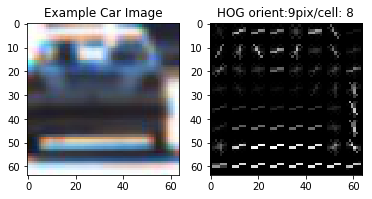

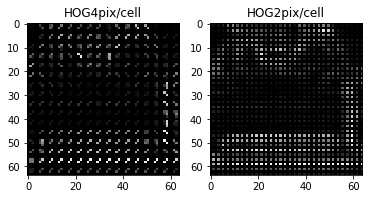

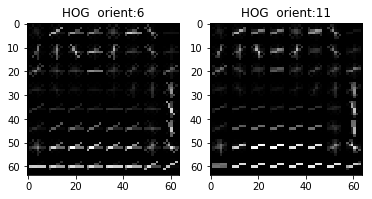

In [46]:
# Extract HOG features and represent them in some examples

images = glob.glob('training_sample/*.jpeg')
#images = glob.glob('*.jpeg')
cars = []
notcars = []

for image in images:
    #print(image)
    if     'image' in image or   'extra' in image:
        #print('not ok')
        notcars.append(image)
    else:
        #print('ok')
        cars.append(image)
        

 # Generate a random index to look at a car image
#print(len(cars))
ind = np.random.randint(0, len(cars))
# Read in the image
image = mpimg.imread(cars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


# Define HOG parameters
orient1 = 9
pix_per_cell1 = 8
cell_per_block1 = 2
# Call our function with vis=True to see an image output
features, hog_image1 = get_hog_features(gray, orient1, 
                        pix_per_cell1, cell_per_block1, 
                        vis=True, feature_vec=False)

orient2 = 9
pix_per_cell2 = 4
cell_per_block2 = 2
# Call our function with vis=True to see an image output
features, hog_image2 = get_hog_features(gray, orient2, 
                        pix_per_cell2, cell_per_block2, 
                        vis=True, feature_vec=False)

orient3 = 9
pix_per_cell3 = 2
cell_per_block3 = 2
# Call our function with vis=True to see an image output
features, hog_image3 = get_hog_features(gray, orient3, 
                        pix_per_cell3, cell_per_block3, 
                        vis=True, feature_vec=False)

orient4 = 6
pix_per_cell4 = 8
cell_per_block4 = 2
# Call our function with vis=True to see an image output
features, hog_image4 = get_hog_features(gray, orient4, 
                        pix_per_cell4, cell_per_block4, 
                        vis=True, feature_vec=False)
orient5 = 11
pix_per_cell5 = 8
cell_per_block5 = 2
# Call our function with vis=True to see an image output
features, hog_image5 = get_hog_features(gray, orient5, 
                        pix_per_cell5, cell_per_block5, 
                        vis=True, feature_vec=False)

# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image1, cmap='gray')
plt.title(str('HOG orient:'+ str(orient1)+'pix/cell: '+str(pix_per_cell1)))#+'cell/block: '+ str(cell_per_block1)))
plt.show()
plt.subplot(121)
plt.imshow(hog_image2, cmap='gray')
plt.title(str('HOG'+ str(pix_per_cell2)+'pix/cell')) # '+str(pix_per_cell2)+'cell/block: '+ str(cell_per_block2)))
plt.subplot(122)
plt.imshow(hog_image3, cmap='gray')
plt.title(str('HOG'+ str(pix_per_cell3)+'pix/cell'))# '+str(pix_per_cell3)+'cell/block: '+ str(cell_per_block3)))
plt.show()
plt.subplot(121)
plt.imshow(hog_image4, cmap='gray')
plt.title(str('HOG  orient:'+ str(orient4)))#+'pix/cell: '+str(pix_per_cell4)+'cell/block: '+ str(cell_per_block4)))
plt.subplot(122)
plt.imshow(hog_image5, cmap='gray')
plt.title(str('HOG  orient:'+ str(orient5)))#+'pix/cell: '+str(pix_per_cell5)+'cell/block: '+ str(cell_per_block5)))
plt.show()





/Users/Mikkawi/anaconda/envs/P5/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


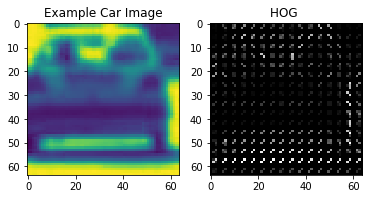

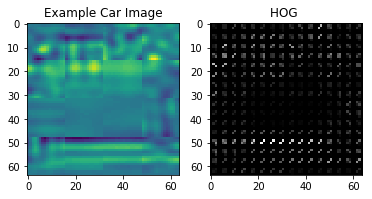

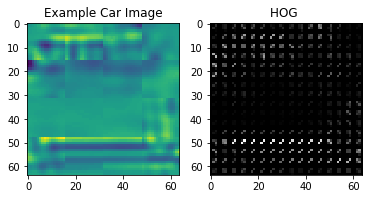

In [47]:
# Extract hog features from other color spaces HLS, YCrCb and represent them, and see the difference



YCrCb_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# Define HOG parameters
orient = 9
pix_per_cell = 4
cell_per_block = 2

#all_hog_features = []
#ch_hog_features =[]


features, hog_image = get_hog_features(YCrCb_image[:,:,0], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
features, hog_image2 = get_hog_features(YCrCb_image[:,:,1], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
features, hog_image3 = get_hog_features(YCrCb_image[:,:,2], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)


fig = plt.figure()
plt.subplot(121)
plt.imshow(YCrCb_image[:,:,0])
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG ')
plt.show()
fig = plt.figure()
plt.subplot(121)
plt.imshow(YCrCb_image[:,:,1])
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image2, cmap='gray')
plt.title('HOG ')
plt.show()
fig = plt.figure()
plt.subplot(121)
plt.imshow(YCrCb_image[:,:,2])
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image3, cmap='gray')
plt.title('HOG ')
plt.show()

/Users/Mikkawi/anaconda/envs/P5/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


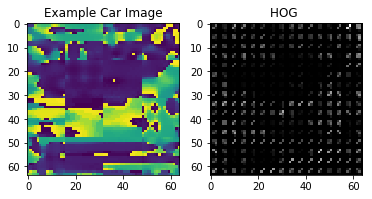

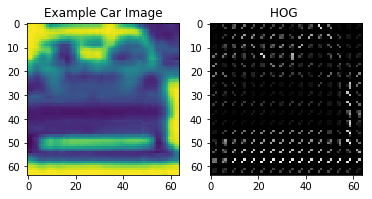

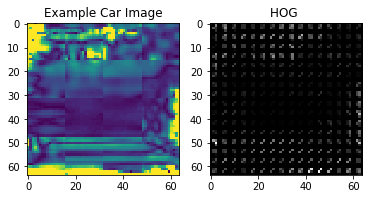

In [48]:
hls_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)

features, hog_image = get_hog_features(hls_image[:,:,0], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
features, hog_image2 = get_hog_features(hls_image[:,:,1], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
features, hog_image3 = get_hog_features(hls_image[:,:,2], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)


fig = plt.figure()
plt.subplot(121)
plt.imshow(hls_image[:,:,0])
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG ')
plt.show()
fig = plt.figure()
plt.subplot(121)
plt.imshow(hls_image[:,:,1])
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image2, cmap='gray')
plt.title('HOG ')
plt.show()
fig = plt.figure()
plt.subplot(121)
plt.imshow(hls_image[:,:,2])
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image3, cmap='gray')
plt.title('HOG ')
plt.show()

/Users/Mikkawi/anaconda/envs/P5/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


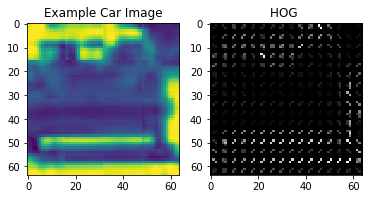

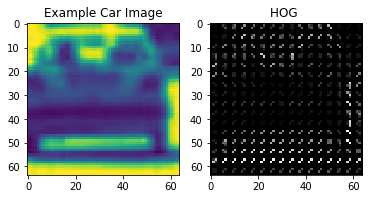

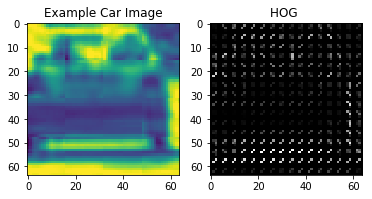

In [49]:
# RGB

features, hog_image = get_hog_features(image[:,:,0], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
features, hog_image2 = get_hog_features(image[:,:,1], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
features, hog_image3 = get_hog_features(image[:,:,2], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)


fig = plt.figure()
plt.subplot(121)
plt.imshow(image[:,:,0])
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG ')
plt.show()
fig = plt.figure()
plt.subplot(121)
plt.imshow(image[:,:,1])
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image2, cmap='gray')
plt.title('HOG ')
plt.show()
fig = plt.figure()
plt.subplot(121)
plt.imshow(image[:,:,2])
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image3, cmap='gray')
plt.title('HOG ')
plt.show()

/Users/Mikkawi/anaconda/envs/P5/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


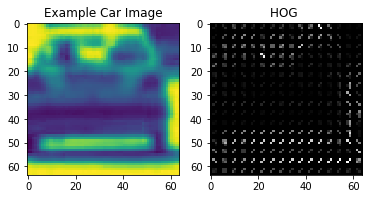

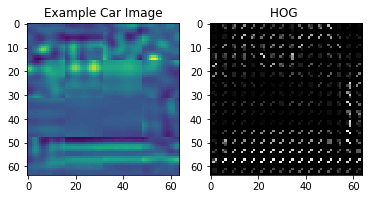

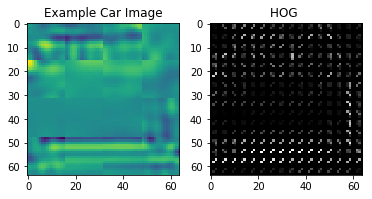

In [51]:
# RGB
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2LUV)

features, hog_image = get_hog_features(image[:,:,0], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
features, hog_image2 = get_hog_features(image[:,:,1], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
features, hog_image3 = get_hog_features(image[:,:,2], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)


fig = plt.figure()
plt.subplot(121)
plt.imshow(hsv_image[:,:,0])
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG ')
plt.show()
fig = plt.figure()
plt.subplot(121)
plt.imshow(hsv_image[:,:,1])
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image2, cmap='gray')
plt.title('HOG ')
plt.show()
fig = plt.figure()
plt.subplot(121)
plt.imshow(hsv_image[:,:,2])
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image3, cmap='gray')
plt.title('HOG ')
plt.show()

In [23]:
# Extract features from cars and non cars photos
images = glob.glob('training_sample/*.jpeg')

cars = []
notcars = []
for image in images:
    if 'image' in image or 'extra' in image:
    #if 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)

data = data_look(cars, notcars)

#print(data['n_cars'], data['n_notcars'], data['image_shape'],data['data_type'])
        
car_features = extract_features(cars, cspace='YCrCb', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
notcar_features = extract_features(notcars, cspace='YCrCb', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))

if len(car_features) > 0:
    #print(len(car_features))
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64) 
    #X = np.vstack(car_features).astype(np.float64) 
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
    plt.show()
else: 
    print('Your function only returns empty feature vectors...')


TypeError: extract_features() got an unexpected keyword argument 'cspace'

In [26]:
# building classifier
# Read in car and non-car images
images = glob.glob('training_sample/*.jpeg')
cars = []
notcars = []
for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)

# TODO play with these values to see how your classifier
# performs under different binning scenarios
spatial = 32
histbin = 32

car_features = extract_features(cars, cspace='YCrCb', spatial_size=(spatial, spatial),
                        hist_bins=histbin, hist_range=(0, 256))
notcar_features = extract_features(notcars, cspace='YCrCb', spatial_size=(spatial, spatial),
                        hist_bins=histbin, hist_range=(0, 256))

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using spatial binning of:',spatial,
    'and', histbin,'histogram bins')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Using spatial binning of: 32 and 32 histogram bins
Feature vector length: 3168
13.76 Seconds to train SVC...
Test Accuracy of SVC =  0.9742
My SVC predicts:  [ 0.  0.  0.  0.  1.  0.  1.  0.  1.  0.]
For these 10 labels:  [ 0.  0.  0.  0.  1.  0.  1.  0.  1.  0.]
0.01483 Seconds to predict 10 labels with SVC


/Users/Mikkawi/anaconda/envs/P5/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 1860
0.54 Seconds to train SVC...
Test Accuracy of SVC =  0.99


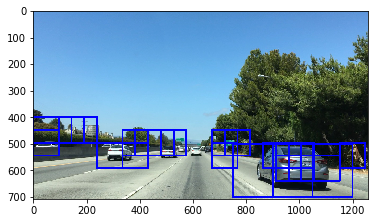

In [57]:
# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows
    
# Read in cars and notcars
images = glob.glob('training_sample/*.jpeg')
cars = []
notcars = []
for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)

# Reduce the sample size because
# The quiz evaluator times out after 13s of CPU time
sample_size = 500
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

### TODO: Tweak these parameters and see how the results change.
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 1 # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = False # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, None] # Min and max in y to search in slide_window()

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

image = mpimg.imread('training_sample/bbox-example-image.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
#image = image.astype(np.float32)/255

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6) 

plt.imshow(window_img)
windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[500,None], 
                    xy_window=(300, 200), xy_overlap=(0.5, 0.5))

hot_windows2 = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img2 = draw_boxes(window_img, hot_windows2, color=(0, 0, 255), thick=6) 

plt.imshow(window_img2)
plt.show()

In [58]:
# False positive functions

from scipy.ndimage.measurements import label

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

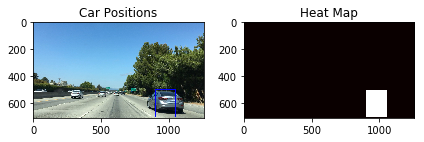

In [59]:
heat = np.zeros_like(image[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat = add_heat(heat,hot_windows2)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()
plt.show()